In [37]:
# import libraries
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

In [38]:
# perform runga-kutta method for a problem with 3 spacial dimensions (x and y, and z) 
# any function can be passed as input for the forces acting on the system.
def runga_kutta_3d(position, velocity, timestep, Fx, Fy, Fz, args_x, args_y, args_z):
    # position = (x_n, y_n, z_n): the x, y and z position at time n
    # velocity = (Vx_n, Vy_n, Vz_n): the velocity vector components for x, y and z at time n
    # timestep: delta(t), interval of time between 2 approximations
    # F_x: the derivative function for x component of velocity
    # F_y: the derivation function for y component of velocity
    # F_z: the derivation function for z component of velocity
    # args_x: arguments to be passed to F_x (in addition to Vx, Vy, Vz, x, y, z)
    # args_y: arguments to be passed to F_y (in addition to Vx, Vy, Vz, x, y, z)
    # args_z: arguments to be passed to F_z (in addition to Vx, Vy, Vz, x, y, z)
    
    x_values = []
    y_values = []
    z_values = []
    
    Vx_values = []
    Vy_values = []
    Vz_values = []
    
    Fx_values = []
    Fy_values = []
    Fz_values = []
    
    # step 1
    x_values.append(position[0])
    y_values.append(position[1])
    z_values.append(position[2])
    
    Vx_values.append(velocity[0])
    Vy_values.append(velocity[1])
    Vz_values.append(velocity[2])
    
    Fx_values.append(Fx(args_x, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fy_values.append(Fy(args_y, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fz_values.append(Fz(args_z, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    
    # step 2
    x_values.append(x_values[0] + Vx_values[0] * timestep/2)
    y_values.append(y_values[0] + Vy_values[0] * timestep/2)
    z_values.append(z_values[0] + Vz_values[0] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[0] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[0] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[0] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fy_values.append(Fy(args_y, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fz_values.append(Fz(args_z, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    
    # step 3
    x_values.append(x_values[0] + Vx_values[1] * timestep/2)
    y_values.append(y_values[0] + Vy_values[1] * timestep/2)
    z_values.append(z_values[0] + Vz_values[1] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[1] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[1] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[1] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fy_values.append(Fy(args_y, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fz_values.append(Fz(args_z, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    
    # step 4
    x_values.append(x_values[0] + Vx_values[2] * timestep)
    y_values.append(y_values[0] + Vy_values[2] * timestep)
    z_values.append(z_values[0] + Vz_values[2] * timestep)
    
    Vx_values.append(Vx_values[0] + Fx_values[2] * timestep)
    Vy_values.append(Vy_values[0] + Fy_values[2] * timestep)
    Vz_values.append(Vz_values[0] + Fz_values[2] * timestep)
    
    Fx_values.append(Fx(args_x, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fy_values.append(Fy(args_y, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fz_values.append(Fz(args_z, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    
    # step 5
    x_final = x_values[0] + ((Vx_values[0] + 2*Vx_values[1] + 2*Vx_values[2] + Vx_values[3])*timestep)/6
    y_final = y_values[0] + ((Vy_values[0] + 2*Vy_values[1] + 2*Vy_values[2] + Vy_values[3])*timestep)/6
    z_final = z_values[0] + ((Vz_values[0] + 2*Vz_values[1] + 2*Vz_values[2] + Vz_values[3])*timestep)/6
    
    Vx_final = Vx_values[0] + ((Fx_values[0] +2*Fx_values[1] +2*Fx_values[2] + Fx_values[3])*timestep)/6
    Vy_final = Vy_values[0] + ((Fy_values[0] +2*Fy_values[1] +2*Fy_values[2] + Fy_values[3])*timestep)/6
    Vz_final = Vz_values[0] + ((Fz_values[0] +2*Fz_values[1] +2*Fz_values[2] + Fz_values[3])*timestep)/6
    
    return (x_final, y_final, z_final), (Vx_final, Vy_final, Vz_final)

# general form for a N body system
def gravitational_force(args, Vx, Vy, Vz, x, y, z):
    n = args[0] # position of body in array of all bodies
    m = args[1] # mass array
    component = args[2] # "x", "y", or "z"
    x_all = args[3] # last x position of all bodies (array)
    y_all = args[4] # last y position of all bodies (array)
    z_all = args[5] # last z position of all bodies (array)
    G_or_const = args[6]
    
    F = 0
    for body in range(len(x_all)):
        if body != n:
            # claculate distance between 2 bodies
            r =  math.sqrt((x_all[body] - x)**2 + (y_all[body] - y)**2 + (z_all[body] - z)**2)
            if component == "x":
                F -= G_or_const * m[body] * ((x - x_all[body])/r**3)
            elif component == "y":
                F -= G_or_const * m[body] * ((y - y_all[body])/r**3)
            elif component == "z":
                F -= G_or_const * m[body] * ((z - z_all[body])/r**3)      
    return F

# general form for a N-body system
def run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, func_grav_force, n_bodies):
    for t in range(n_timesteps):
    # set array with last position for all bodies
        x_last_all = []
        y_last_all = []
        z_last_all = []
        for n in range(n_bodies):
            x_last_all.append(x[n][-1])
            y_last_all.append(y[n][-1])
            z_last_all.append(z[n][-1])

        # update position and velocity for all bodies
        for n in range(n_bodies):
            # for a specific body: p_components are its position, v_components are its velocity components
            p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
            v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])

            # parameters to pass to gravitational_force() function
            args_x = (n, m, "x", x_last_all, y_last_all, z_last_all, norm_const)
            args_y = (n, m, "y", x_last_all, y_last_all, z_last_all, norm_const)
            args_z = (n, m, "z", x_last_all, y_last_all, z_last_all, norm_const)

            p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, func_grav_force, func_grav_force, func_grav_force, args_x, args_y, args_z)

            # add new value in arrays
            x[n].append(p_components[0])
            y[n].append(p_components[1])
            z[n].append(p_components[2])

            Vx[n].append(v_components[0])
            Vy[n].append(v_components[1])
            Vz[n].append(v_components[2])
    return x, y, z, Vx, Vy, Vz

def estimate_circular_velocity(Ms, Mp, T, G):
    # Ms = mass of star
    # Mp = mass of planet
    # formula from derivation (see notes submitted with this notebook)
    # write different steps to make it easier to read
    product1 = (4*(math.pi)**2)**(1/6)
    product2 = G**(1/3)
    product3 = Mp/Ms
    product4 = (Ms + Mp)**(1/3)
    product5 = T**(-1/3)
    return product1 * product2 * product3 * product4 * product5


In [40]:
# universal gravitation constant and constants for nondimensional code (see notes submitted with this notebook)
G = 6.67259e-20  # (km**3/kg/s**2)
mass_sun = 1.989e30 # kg
AU = 1.496e8 # km
year = 3.156e7 # s
norm_const = (G * mass_sun * (year**2))/(AU**3) # for nondimensional code

# variables that will not change for all simulations in this assignment
mass_earth = 5.972e24 # kg
timestep = 86400/year # 86400 seconds is 1 day || divide by year to non-dimensionalize

## A 2-body system

In [41]:
n_bodies = 2

# Assume circular orbit (see notes submitted with this notebook)
# initialize position and velocities for a 2-body system
def initialize_2_bodies(x_planet, mass_star, mass_planet):
    x = [[], [x_planet]]  
    y = [[0], [0]]
    z = [[0], [0]]
    Vx = [[0], [0]]
    Vy = [[], []]
    Vz = [[0], [0]]

    # sun position: x_sun = - (mass_earth * x_earth) / mass_sun
    star_pos = -1 * (mass_planet * x[1][0]) / (mass_star)
    x[0].append(star_pos)

    # velocity of planet
    v_planet = math.sqrt(norm_const * (mass_star/(-x[0][0] + x[1][0])))
    Vy[1].append(v_planet)

    # velocity of star
    v_star = -1 * math.sqrt(norm_const * (mass_planet/(-x[0][0] + x[1][0])))
    Vy[0].append(v_star)

    return x, y, z, Vx, Vy, Vz

In [42]:
# set array of masses and non-dimentionalize
m = [mass_sun, mass_earth]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[-3.002513826043238e-06], [1]]
y: [[0], [0]]
z: [[0], [0]]
Vx: [[0], [0]]
Vy: [[-0.010887948849292941], [6.283528134214927]]
Vz: [[0], [0]]


In [43]:
# run the simulation
n_timesteps = 365*3 # number of timesteps (365 days for 1 orbit, we simulate 3 orbits)
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

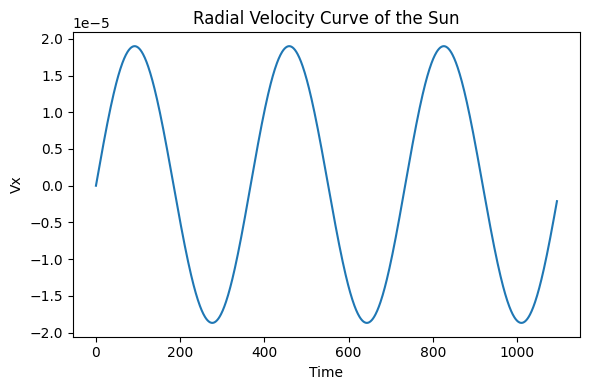

Amplitude: 1.8833859645711705e-05
Period: 366.5


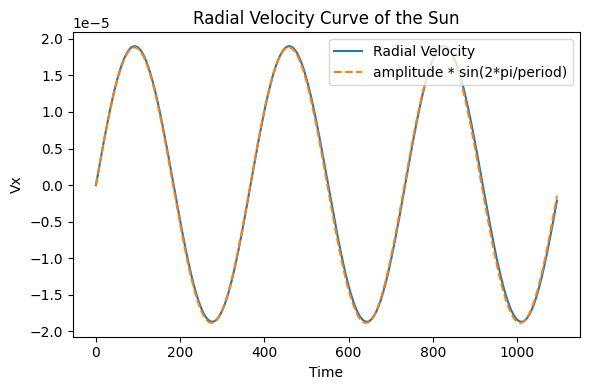

In [44]:
# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("radial_velocity_curve.png")
plt.show()

# get amplitude
min_Vx = min(Vx[0])
max_Vx = max(Vx[0])
amplitude = (max_Vx -min_Vx)/2 # use the mean
print("Amplitude:", amplitude)

# now find the period
ind = 200
for nb in Vx[0][200:400]: # we know with the graph that the end of the period is bertween timesteps 200 and 400
    if nb >= 0:
        period = ((ind - 1) + (ind - 2))/2 # take the mean
        break
    ind += 1
print("Period:", period)

fig = plt.figure(dpi = 100)
sin_val = [amplitude * math.sin((2*math.pi/period)*i) for i in range(len(Vx[0]))]
plt.plot(range(len(Vx[0])), Vx[0], label = "Radial Velocity")
plt.plot(range(len(Vx[0])), sin_val, "--", label = "amplitude * sin(2*pi/period)")
plt.title("Radial Velocity Curve of the Sun")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig("radial_velocity_curve_and_sin.png")
plt.show()

In [45]:
estimate = estimate_circular_velocity(m[0], m[1], 1, norm_const) # 1 because the period is 1 year
print("Estimate of Ampliude from derivation:", estimate)
print("Amplitude from simulation:", amplitude)

Estimate of Ampliude from derivation: 1.886607474243957e-05
Amplitude from simulation: 1.8833859645711705e-05


## Simulations with different masses (for the planet)

### TEST 1: mass_planet = mass_earth * 2

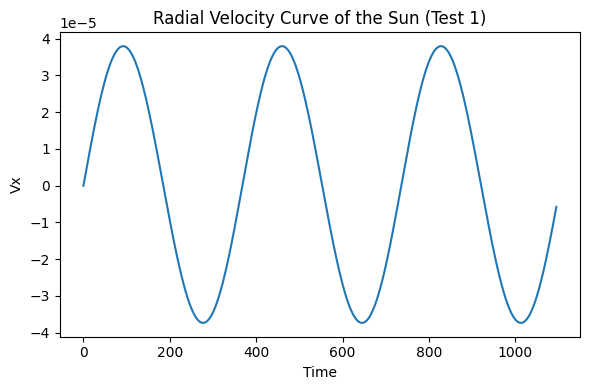

Estimate of Ampliude from derivation: 3.7732187248494797e-05
Amplitude from simulation: 3.764088739800562e-05


In [46]:
# set array of masses and normalize
m = [mass_sun, mass_earth* 2]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# run the simulation
n_timesteps = 365*3 # number of timesteps (365 days for 1 orbit, we simulate 3 orbits)
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 1)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("test1.png")
plt.show()

# get amplitude
min_Vx = min(Vx[0])
max_Vx = max(Vx[0])
amplitude = (max_Vx -min_Vx)/2 # use the mean

estimate = estimate_circular_velocity(m[0], m[1], 1, norm_const) # 1 because the period is 1 year
print("Estimate of Ampliude from derivation:", estimate)
print("Amplitude from simulation:", amplitude)

### TEST 2: mass_planet = mass_earth * 10

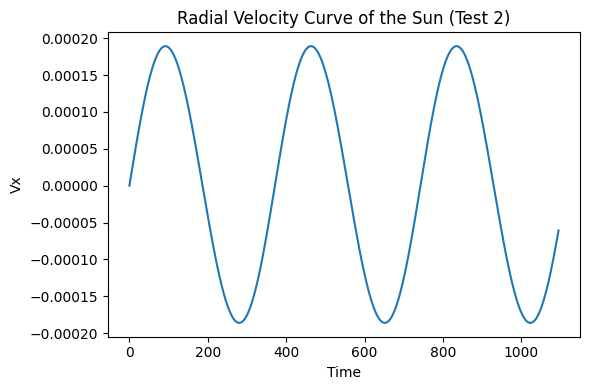

Estimate of Ampliude from derivation: 0.0001886624467734942
Amplitude from simulation: 0.00018763443711050326


In [47]:
# set array of masses and normalize
m = [mass_sun, mass_earth* 10]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# run the simulation
n_timesteps = 365*3 # number of timesteps (365 days for 1 orbit, we simulate 3 orbits)
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 2)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("test2.png")
plt.show()

# get amplitude
min_Vx = min(Vx[0])
max_Vx = max(Vx[0])
amplitude = (max_Vx -min_Vx)/2 # use the mean

estimate = estimate_circular_velocity(m[0], m[1], 1, norm_const) # 1 because the period is 1 year
print("Estimate of Ampliude from derivation:", estimate)
print("Amplitude from simulation:", amplitude)

### TEST 3: mass_planet = mass_earth * 100

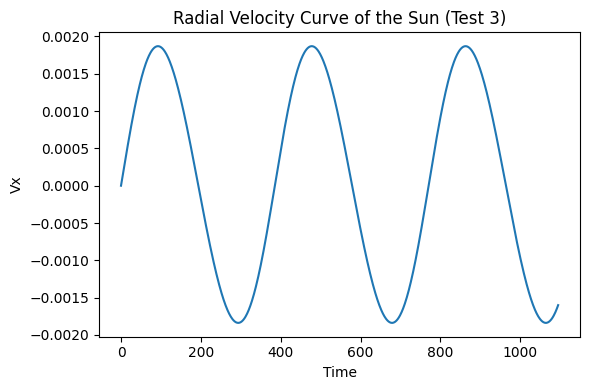

Estimate of Ampliude from derivation: 0.001886794385810074
Amplitude from simulation: 0.0018541807326232901


In [48]:
# set array of masses and normalize
m = [mass_sun, mass_earth* 100]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# run the simulation
n_timesteps = 365*3 # number of timesteps (365 days for 1 orbit, we simulate 3 orbits)
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 3)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("test3.png")
plt.show()

# get amplitude
min_Vx = min(Vx[0])
max_Vx = max(Vx[0])
amplitude = (max_Vx -min_Vx)/2 # use the mean

estimate = estimate_circular_velocity(m[0], m[1], 1, norm_const) # 1 because the period is 1 year
print("Estimate of Ampliude from derivation:", estimate)
print("Amplitude from simulation:", amplitude)

## Exploring the effects of eccentricity

### TEST 4: increase inital velocity of planet * 1.15

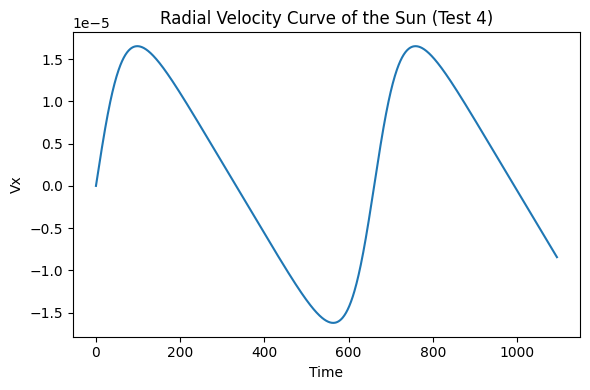

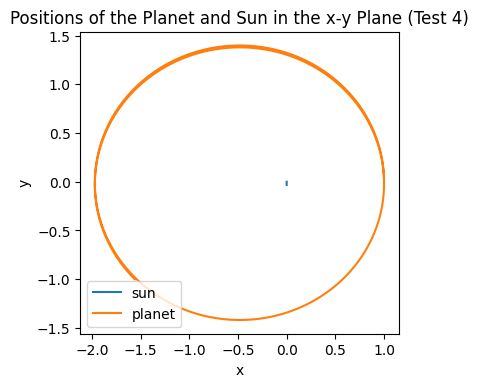

In [50]:
# set array of masses and normalize
m = [mass_sun, mass_earth]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# change initial velocity of planet
Vy[1][0] = Vy[1][0]*1.15

# run the simulation
n_timesteps = 365*3 # number of timesteps
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 4)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("test4-1.png")
plt.show()

ax = plt.figure(dpi = 100).add_subplot()
ax.set_aspect('equal')
plt.title("Positions of the Planet and Sun in the x-y Plane (Test 4)")
ax.plot(x[0], y[0], label='sun')
ax.plot(x[1], y[1], label='planet')
plt.xlabel("x")
plt.ylabel("y")
ax.legend(loc = 'lower left')
plt.savefig("test4-2.png")
plt.show()

### TEST 5: increase inital velocity of planet * 1.25

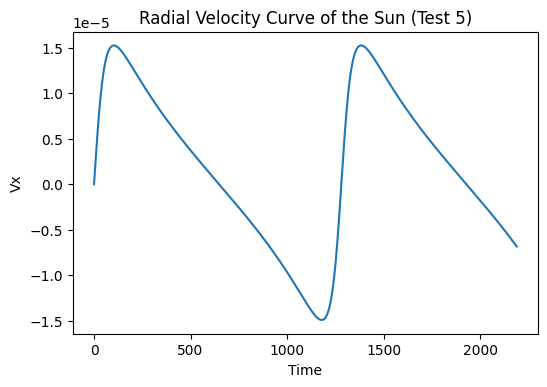

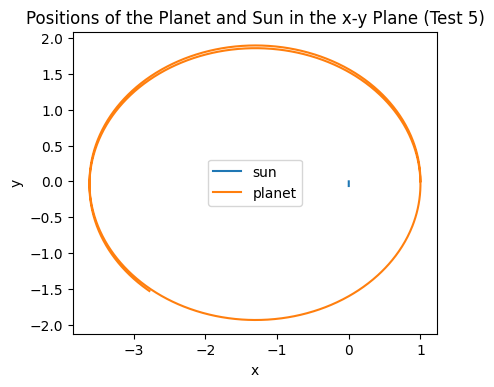

In [51]:
# set array of masses and normalize
m = [mass_sun, mass_earth]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# change initial velocity of planet
Vy[1][0] = Vy[1][0]*1.25

# run the simulation
n_timesteps = 365*6 # number of timesteps
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 5)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.savefig("test5-1.png")
plt.show()
plt.show()

ax = plt.figure(dpi = 100).add_subplot()
ax.set_aspect('equal')
plt.title("Positions of the Planet and Sun in the x-y Plane (Test 5)")
ax.plot(x[0], y[0], label='sun')
ax.plot(x[1], y[1], label='planet')
plt.xlabel("x")
plt.ylabel("y")
ax.legend()
plt.savefig("test5-2.png")
plt.show()

### TEST 6: increase inital velocity of planet * 1.4

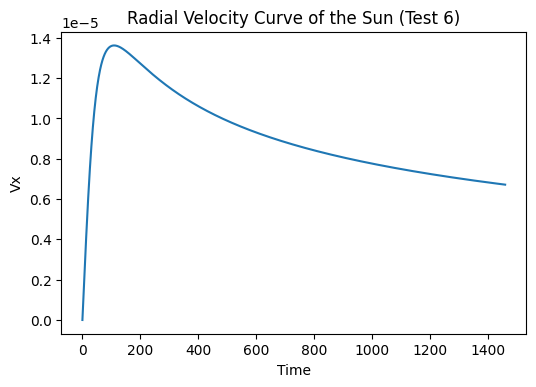

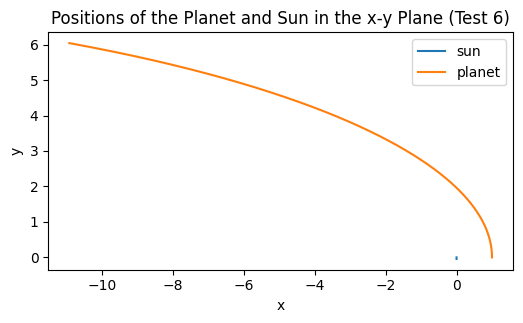

In [52]:
# set array of masses and normalize
m = [mass_sun, mass_earth]
m = [i/mass_sun for i in m]

# Initialization
# x-position of sun is not calculated yet, x-position of earth is initialized to 1 AU
x, y, z, Vx, Vy, Vz = initialize_2_bodies(1, m[0], m[1])

# change initial velocity of planet
Vy[1][0] = Vy[1][0]*1.4

# run the simulation
n_timesteps = 365*4 # number of timesteps
x, y, z, Vx, Vy, Vz = run_simulation(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, n_bodies)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun (Test 6)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.savefig("test6-1.png")
plt.show()
plt.show()

ax = plt.figure(dpi = 100).add_subplot()
ax.set_aspect('equal')
plt.title("Positions of the Planet and Sun in the x-y Plane (Test 6)")
ax.plot(x[0], y[0], label='sun')
ax.plot(x[1], y[1], label='planet')
plt.xlabel("x")
plt.ylabel("y")
ax.legend()
plt.savefig("test6-2.png")
plt.show()

## 2 Non-Interacting Planets (3-body system)

In [53]:
n_bodies = 3

# when planets are only gravitationally attracted to star
# neglect gravitational force between planets
def gravitational_force_alt(args, Vx, Vy, Vz, x, y, z):
    m_star = args[0] # mass array
    component = args[1] # "x", "y", or "z"
    x_star = args[2] # last x position of star
    y_star = args[3] # last y position of star
    z_star = args[4] # last z position of star
    G_or_const = args[5]
 
    F = 0
    r =  math.sqrt((x_star - x)**2 + (y_star - y)**2 + (z_star - z)**2)
    if component == "x":
        F -= G_or_const * m_star * ((x - x_star)/r**3)
    elif component == "y":
        F -= G_or_const * m_star * ((y - y_star)/r**3)
    elif component == "z":
        F -= G_or_const * m_star * ((z - z_star)/r**3)
    return F

# sun attracted by 2 planets but planets not attracted to each other
def run_simulation_alt(x, y, z, Vx, Vy, Vz, m, n_timesteps, func_grav_force_star, func_grav_force_planet, n_bodies):
    for t in range(n_timesteps):
    # set array with last position for all bodies
        x_last_all = []
        y_last_all = []
        z_last_all = []
        for n in range(n_bodies):
            x_last_all.append(x[n][-1])
            y_last_all.append(y[n][-1])
            z_last_all.append(z[n][-1])
            
        # 1. update position for sun (attracted by 2 planets)
        p_components = (x_last_all[0], y_last_all[0], z_last_all[0])
        v_components = (Vx[0][-1], Vy[0][-1], Vz[0][-1])
        # parameters to pass to gravitational_force() function
        args_x = (0, m, "x", x_last_all, y_last_all, z_last_all, norm_const)
        args_y = (0, m, "y", x_last_all, y_last_all, z_last_all, norm_const)
        args_z = (0, m, "z", x_last_all, y_last_all, z_last_all, norm_const)
        # call Runga Kutta
        p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, func_grav_force_star, func_grav_force_star, func_grav_force_star, args_x, args_y, args_z)
        # add new values in arrays
        x[0].append(p_components[0])
        y[0].append(p_components[1])
        z[0].append(p_components[2])
        Vx[0].append(v_components[0])
        Vy[0].append(v_components[1])
        Vz[0].append(v_components[2])

        # update position and velocity for planets
        for n in range(1, n_bodies): # don t count the sun
            # for a specific body: p_components are its position, v_components are its velocity components
            p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
            v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])

            # parameters to pass to gravitational_force() function
            args_x = (m[0], "x", x_last_all[0], y_last_all[0], z_last_all[0], norm_const)
            args_y = (m[0], "y", x_last_all[0], y_last_all[0], z_last_all[0], norm_const)
            args_z = (m[0], "z", x_last_all[0], y_last_all[0], z_last_all[0], norm_const)

            p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, func_grav_force_planet, func_grav_force_planet, func_grav_force_planet, args_x, args_y, args_z)

            # add new value in arrays
            x[n].append(p_components[0])
            y[n].append(p_components[1])
            z[n].append(p_components[2])

            Vx[n].append(v_components[0])
            Vy[n].append(v_components[1])
            Vz[n].append(v_components[2])
        
    return x, y, z, Vx, Vy, Vz

# initialize position and velocities for a 3-body system with circular orbit
def initialize_3_bodies(x_planet1, x_planet2, mass_star, mass_planet1, mass_planet2):
    x = [[], [x_planet1], [x_planet2]]  
    y = [[0], [0], [0]]
    z = [[0], [0], [0]]
    Vx = [[0], [0], [0]]
    Vy = [[], [], []]
    Vz = [[0], [0], [0]]

    # sun position: x_sun = - (mass_planet1*x_planet1 + mass_planet2*x_planet2) / mass_sun
    sun_pos = -1 * (mass_planet1*x[1][0] + mass_planet2*x[2][0]) / (mass_star)
    x[0].append(sun_pos)

    # velocity of planet 1
    v_planet1 = math.sqrt(norm_const * (mass_star/(-x[0][0] + x[1][0])))
    Vy[1].append(v_planet1)
    
    # velocity of planet 2
    v_planet2 = math.sqrt(norm_const * (mass_star/(-x[0][0] + x[2][0])))
    Vy[2].append(v_planet2)

    # velocity of sun
    v_sun = -1 * math.sqrt(norm_const * ((mass_planet1 + mass_planet2)/(-x[0][0] + (x[1][0] + x[2][0])/2)))
    Vy[0].append(v_sun)

    return x, y, z, Vx, Vy, Vz


In [54]:
# set array of masses and non-dimensionalize
m = [mass_sun, mass_earth, mass_earth*2]
m = [i/mass_sun for i in m]

# Initialization
x, y, z, Vx, Vy, Vz = initialize_3_bodies(1, 2, m[0], m[1], m[2])

print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[-1.501256913021619e-05], [1], [2]]
y: [[0], [0], [0]]
z: [[0], [0], [0]]
Vx: [[0], [0], [0]]
Vy: [[-0.015397830991783842], [6.283490401907895], [4.443115348134689]]
Vz: [[0], [0], [0]]


In [55]:
# run the simulation
n_timesteps = 365*5 # number of timesteps (365 days for 1 orbit, we simulate 5 orbits)
x, y, z, Vx, Vy, Vz = run_simulation_alt(x, y, z, Vx, Vy, Vz, m, n_timesteps, gravitational_force, gravitational_force_alt, n_bodies)

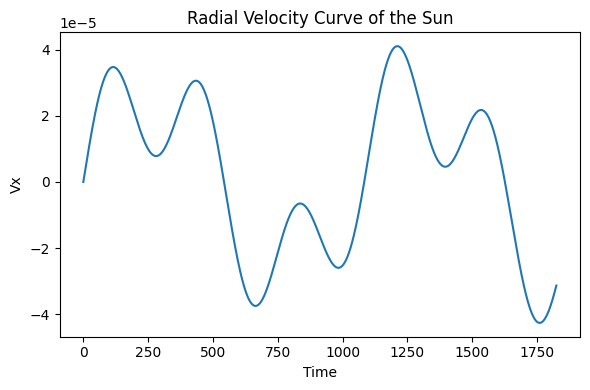

In [56]:
# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0])
plt.title("Radial Velocity Curve of the Sun")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.savefig("radial_velocity_curve_3_bodies.png")
plt.show()

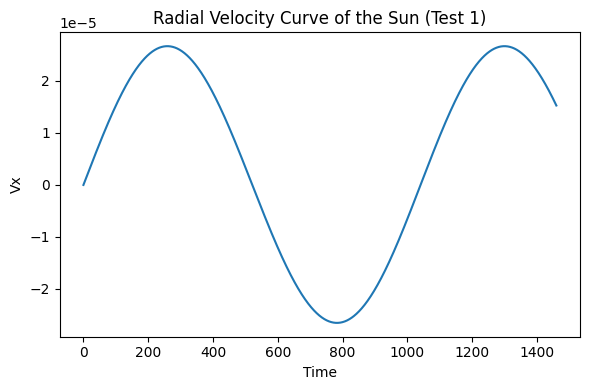

Planet 1: amplitude = 1.8833859645711705e-05, period = 366.5 days
Planet 2: amplitude = 2.6615840792727815e-05, period = 1039.5 days


In [57]:
# get amplitude and period of 2 planets separately

# for planet 1, we already know from the first graph witch displayed that
amplitude_1 = 1.8833859645711705e-05
period_1 = 366.5

# for planet 2, need to do the experiment 
# simulate a 2 body system with mass_planet = mass-earth *2 and x_init_planet = 2 AU
m_tmp = [mass_sun, mass_earth* 2]
m_tmp = [i/mass_sun for i in m_tmp]
x_tmp, y_tmp, z_tmp, Vx_tmp, Vy_tmp, Vz_tmp = initialize_2_bodies(2, m_tmp[0], m_tmp[1])
n_timesteps_tmp = 365*4
x_tmp, y_tmp, z_tmp, Vx_tmp, Vy_tmp, Vz_tmp = run_simulation(x_tmp, y_tmp, z_tmp, Vx_tmp, Vy_tmp, Vz_tmp, m_tmp, n_timesteps_tmp, gravitational_force, 2)

# analysis
fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx_tmp[0])), Vx_tmp[0])
plt.title("Radial Velocity Curve of the Sun (Test 1)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.show()

# get amplitude
min_Vx_tmp = min(Vx_tmp[0])
max_Vx_tmp = max(Vx_tmp[0])
amplitude_2 = (max_Vx_tmp -min_Vx_tmp)/2 # use the mean

# now find the period
ind = 900
for nb in Vx_tmp[0][900:1200]: # we know with the graph that the end of the period is bertween timesteps 900 and 1200
    if nb >= 0:
        period_2 = ((ind - 1) + (ind - 2))/2 # take the mean
        break
    ind += 1
    
print("Planet 1: amplitude = %s, period = %s days"%(amplitude_1, period_1))
print("Planet 2: amplitude = %s, period = %s days"%(amplitude_2, period_2))

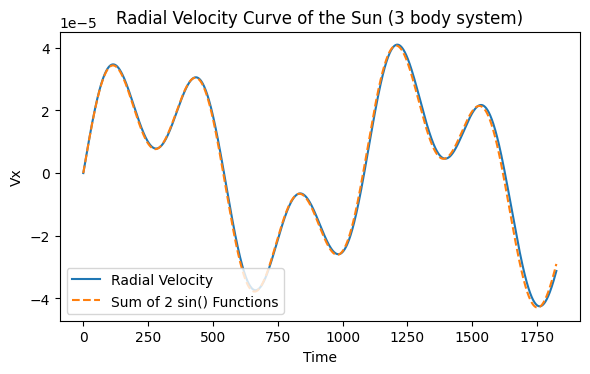

In [58]:
# try to build the sine function based on that

sin_1 = [amplitude_1 * math.sin((2*math.pi/period_1)*i) for i in range(len(Vx[0]))]
sin_2 = [amplitude_2 * math.sin((2*math.pi/period_2)*i) for i in range(len(Vx[0]))]
sin_val = []
for i in range(len(sin_1)):
    sin_val.append(sin_1[i] + sin_2[i])

fig = plt.figure(dpi = 100)
plt.plot(range(len(Vx[0])), Vx[0], label = "Radial Velocity")
plt.plot(range(len(Vx[0])), sin_val, "--", label = "Sum of 2 sin() Functions")
plt.title("Radial Velocity Curve of the Sun (3 body system)")
plt.xlabel("Time")
plt.ylabel("Vx")
plt.tight_layout()
plt.legend(loc = "lower left")
plt.savefig("radial_velocity_curve_3_bodies_sin.png")
plt.show()

In [ ]:
# end of the notebook